In [332]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [333]:
Leads_1 = pd.read_csv('Leads.csv')
Leads_1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [334]:
# Performing Data Quality Checks :
Leads_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [335]:
Leads_1.shape

(9240, 37)

In [336]:
# Duplicate Checks :

sum(Leads_1.duplicated(subset = 'Prospect ID'))

0

In [337]:
# From the above we can infer that there are no duplicate values .

In [338]:
Leads_1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [339]:
# Let's Move to the Data Cleaning :
# Converting the Data which contains "Select Values"  to NaN

In [340]:
Leads_1 = Leads_1.replace('Select', np.nan)

In [341]:
# Checking the data For NULL datasets :
round((100*Leads_1.isnull().sum()/Leads_1.shape[0]),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [342]:
# Setting up a condition for the checking the values over 40% for the NUll data set
to_drop=Leads_1.loc[:,list(round((100*Leads_1.isnull().sum()/Leads_1.shape[0]),2)>40)].columns
to_drop

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [343]:
# Dropping columns that have more than 40% null values
Leads_1 = Leads_1.drop(to_drop,axis=1)

In [344]:
# Checking null values Percentage :
round((100*Leads_1.isnull().sum()/Leads_1.shape[0]),2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

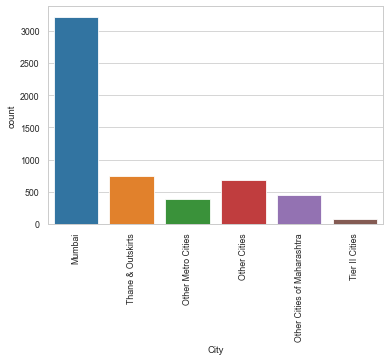

In [345]:
# Understanding the dataset of 'City' :
sns.countplot(Leads_1.City)
plt.xticks(rotation = 90)
plt.show()

In [346]:
# Imputing Null with 'Others'
Leads_1['City'] = Leads_1['City'].replace(np.nan, 'Others')

# Merging Cities which are low in numbers to 'Others'
Leads_1['City'] = Leads_1['City'].replace(['Tier II Cities','Other Metro Cities','Other Cities of Maharashtra','Other Cities'], 'Others')

In [347]:
Leads_1['City'].value_counts()

Others               5266
Mumbai               3222
Thane & Outskirts     752
Name: City, dtype: int64

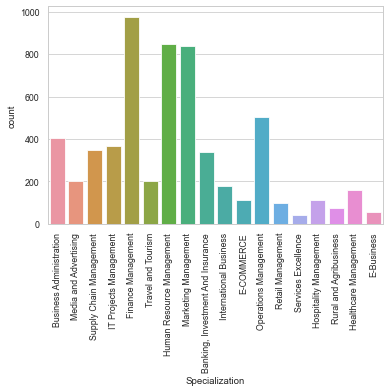

In [348]:
# Understanding the dataset of 'Specialization' :
sns.countplot(Leads_1.Specialization)
plt.xticks(rotation = 90)
plt.show()

In [349]:
Leads_1.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [350]:
# Imputing Null with 'Others'
Leads_1['Specialization'] = Leads_1['Specialization'].replace(np.nan, 'Others')

# Merging Specialization which are low in numbers to 'Others'
Leads_1['Specialization'] = Leads_1['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence'], 'Others')

In [351]:
Leads_1.Specialization.value_counts()

Others                               3550
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Name: Specialization, dtype: int64

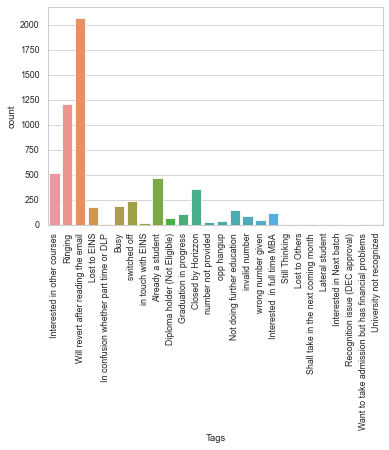

In [352]:
# Understanding the dataset of 'Tags' :
sns.countplot(Leads_1.Tags)
plt.xticks(rotation = 90)
plt.show()

In [353]:
Leads_1.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [354]:
# Imputing Null with Others
Leads_1['Tags'] = Leads_1['Tags'].replace(np.nan, 'Others')

# Merging the dataset with low frequency(Criteria : Each category should have minimum 5% of total data)
Leads_1['Tags'] = Leads_1['Tags'].replace(['switched off', 'Busy', 'Lost to EINS', 'Not doing further education', 'Interested  in full time MBA',
                                     'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
                                     'number not provided', 'in touch with EINS', 'Lost to Others', 'Want to take admission but has financial problems',
                                     'Still Thinking', 'Interested in Next batch', 'In confusion whether part time or DLP', 'Lateral student',
                                     'Shall take in the next coming month', 'University not recognized', 'Recognition issue (DEC approval)','Closed by Horizzon'
                                     ], 'Others')

Leads_1.Tags.value_counts()

Others                                 4987
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Name: Tags, dtype: int64

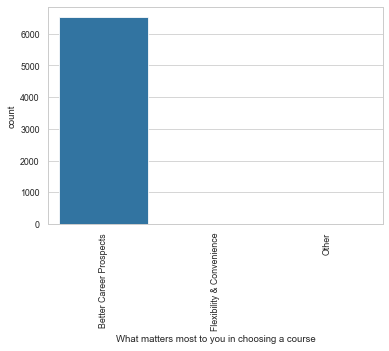

In [355]:
# Understanding the dataset of 'What matters most to you in choosing a course ' :
sns.countplot(Leads_1['What matters most to you in choosing a course'])
plt.xticks(rotation = 90)
plt.show()

In [356]:
Leads_1['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [357]:
# Let's drop the dataset of 'What matters the most to you choosing a course' as it is highy skewed.
Leads_1 = Leads_1.drop('What matters most to you in choosing a course',axis=1)

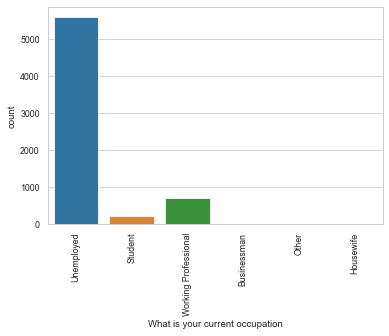

In [358]:
# Understanding the data set of 'What is your Currrent Occupation'
sns.countplot(Leads_1['What is your current occupation'])
plt.xticks(rotation = 90)
plt.show()

In [359]:
Leads_1['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [360]:
# Imputing Null with Others :
Leads_1['What is your current occupation'] = Leads_1['What is your current occupation'].replace(np.nan, 'Other')

In [361]:
Leads_1['What is your current occupation'].value_counts()

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

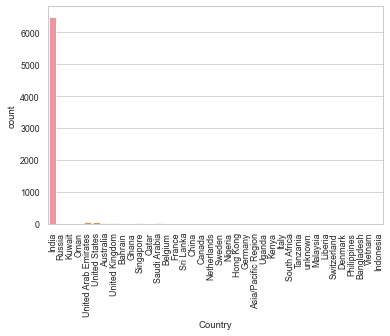

In [362]:
# Understanding the data set for 'Country':
sns.countplot(Leads_1['Country'])
plt.xticks(rotation = 90)
plt.show()

In [363]:
Leads_1['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [364]:
# Dropping the dataset 'Country' as it is highly skewed :
Leads_1 = Leads_1.drop('Country',axis=1)

In [365]:
# Understanding the dataset 'Last Activity' :
Leads_1['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [366]:
# Imputing Null with Others :
Leads_1['Last Activity'] = Leads_1['Last Activity'].replace(np.nan, 'Others')

# Merging the items with low frequency to Others :
Leads_1['Last Activity'] = Leads_1['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                   'View in browser link Clicked','Email Received','Email Marked Spam','Resubscribed to emails',
                                                  'Visited Booth in Tradeshow'], 'Others')

In [367]:
# Understading the unique value counts of 'Lead Source':

Leads_1['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [368]:
# As we can see from the above data that there are two Google sets so we will combine them to one category of Data set:
Leads_1['Lead Source'] = Leads_1['Lead Source'].replace('google', 'Google')
# Imputing Null with Others :
Leads_1['Lead Source'] = Leads_1['Lead Source'].replace(np.nan, 'Others')

# Merging low frequency data set items to Others :
Leads_1['Lead Source'] = Leads_1['Lead Source'].replace(['bing', 'Click2call', 'Press_Release',
                                                   'youtubechannel', 'welearnblog_Home',
                                                   'WeLearn', 'blog', 'Pay per Click Ads',
                                                   'testone', 'NC_EDM', 'Live Chat', 'Facebook', 'Social Media'], 'Others')

In [369]:
# Checking the unique Value Counts :
Leads_1['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others               114
Name: Lead Source, dtype: int64

In [370]:
# Understanding the dataset 'Last Activity' :
Leads_1['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [371]:
# As we can see there are less frequency values in the dataset hence we need to merge them into 'Others' :
Leads_1['Last Notable Activity'] = Leads_1['Last Notable Activity'].replace(['Email Bounced', 'Unsubscribed', 'Unreachable', 
                                                                         'Had a Phone Conversation', 'Email Marked Spam', 
                                                                         'Resubscribed to emails', 'Approached upfront', 
                                                                         'Email Received', 'Form Submitted on Website', 
                                                                         'View in browser link Clicked'], 'Others')

In [372]:
# Understanding the data set 'Total Visits' :
Leads_1.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [373]:
# Impute 'Total Visits' with 'Median' :
TotalVisits_med = Leads_1.TotalVisits.median()
Leads_1.TotalVisits.fillna(TotalVisits_med, inplace=True)

In [374]:
# Understanding the data set 'Page Views Per Visit':
Leads_1['Page Views Per Visit'].describe

<bound method NDFrame.describe of 0       0.00
1       2.50
2       2.00
3       1.00
4       1.00
        ... 
9235    2.67
9236    2.00
9237    2.00
9238    3.00
9239    3.00
Name: Page Views Per Visit, Length: 9240, dtype: float64>

In [375]:
# Impute 'Page Views Per Visit' with the 'Median' :
pvpv_med = Leads_1['Page Views Per Visit'].median()
Leads_1['Page Views Per Visit'].fillna(pvpv_med, inplace=True)

In [376]:
# Now We check the Entire data for NULLS :
round((100*Leads_1.isnull().sum()/Leads_1.shape[0]),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website             

In [377]:
# Now we check the Data Distribution for the categorical columns :
Leads_1_cat = Leads_1.loc[:, Leads_1.dtypes == 'object']
for i in Leads_1_cat:
    print(Leads_1[i].astype('category').value_counts())
    print('**********************************************')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
**********************************************
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
**********************************************
Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others               114
Name: 

In [378]:
to_drop_cols = ['Do Not Call', 'Do Not Email', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
                'Through Recommendations', 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                'Get updates on DM Content', 'I agree to pay the amount through cheque']
Leads_1.drop(to_drop_cols, axis=1, inplace=True)

In [379]:
Leads_1.shape

(9240, 15)

In [380]:
Leads_1.info

<bound method DataFrame.info of                                Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source  Converted  TotalVisits  \
0                         API      Olark Chat          0          0.0   
1                         API  Organic Search          0          5.0   
2     Landing Page Submission  Direct Tr

In [381]:
# Now We create a copy of the dataset excluding the unique identifiers :
Leads_1_excl = Leads_1.drop(['Prospect ID', 'Lead Number'], axis=1)

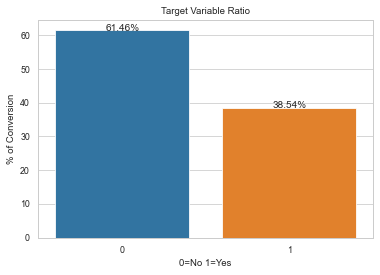

In [382]:
# Data Visualization :
# No we proceed with the data visualization :
# Let's start of this with the univariate and bivariate analysis :

# Percentage of covered data :
ax=sns.barplot(x='Converted', y='Converted', data=Leads_1_excl, estimator=lambda x: len(x) / len(Leads_1_excl) * 100)
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))
plt.title('Target Variable Ratio')
plt.xlabel('0=No 1=Yes')
plt.xticks(rotation=0)
plt.ylabel('% of Conversion')
plt.show()

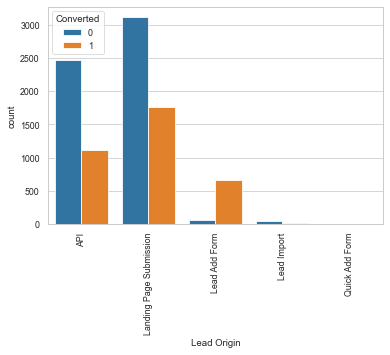

In [383]:
# Origin of the Lead :
sns.countplot(x = "Lead Origin", hue = "Converted", data = Leads_1_excl)
plt.xticks(rotation = 90)
plt.show()

In [384]:
# Inference :
# What we can infer from the above data is that API and Landing Page Submission have 35-40% conversion reat but count of lead originate from them are considerable.
# We can also infer that the Lead Add Form has more than 90% conversion rate but the values are not that high .
# We also infer that the Lead Import and Quick Add Form are very Low.

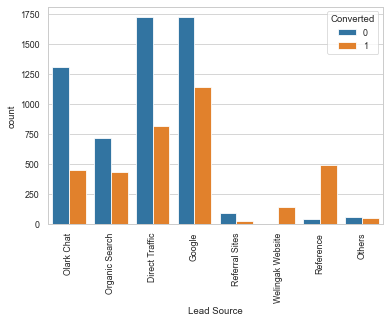

In [385]:
# Understanding Lead Source : 
sns.countplot(x = "Lead Source", hue = "Converted", data = Leads_1_excl)
plt.xticks(rotation =90)
plt.show()

In [386]:
# Inference :
# What we can infer from the above plot is that Google and Data Traffic are generating very high number of leads but they should focus for their conversion 
# We can also infer that Welingak and Reference are having more conversion rate hence should be focused to generate more leads.

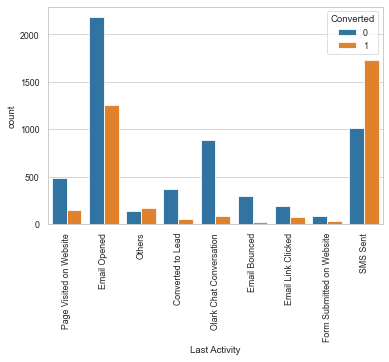

In [387]:
# Understading Last Activity :
sns.countplot(x = "Last Activity", hue = "Converted", data = Leads_1_excl)
plt.xticks(rotation = 90)
plt.show()

In [388]:
# Inference :
# What we can infer from the above plot is that the most of the leads have Emails Opened and SMS Sent and should focus more on the Leads Opening Mail .
# We can also see that the coversion rate for SMS sent is very high and hence we should focus more on the lead conversion for the same .

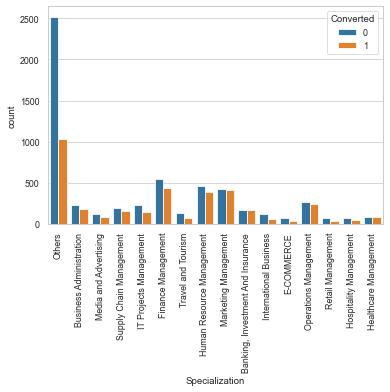

In [389]:
# Understanding Specialization :
sns.countplot(x = "Specialization", hue = "Converted", data = Leads_1_excl)
plt.xticks(rotation = 90)
plt.show()

In [390]:
# Inference :
# What we can infer from the above plot is that focus should be more on the Various Specialization with less leads but high conversion rates.
# Also we can see that the most of the leads are from 'Others'.

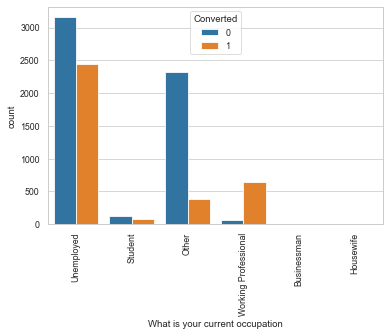

In [391]:
# Understanding 'What is your current occupation ?'
sns.countplot(x = "What is your current occupation", hue = "Converted", data = Leads_1_excl)
plt.xticks(rotation = 90)
plt.show()

In [392]:
# Inference :
# What we can infer from the above plot is that The Working Professionals have a very high conversion rates
# Also the most leads are from the Unemployed Sections , we should focus more on increasing conversion .

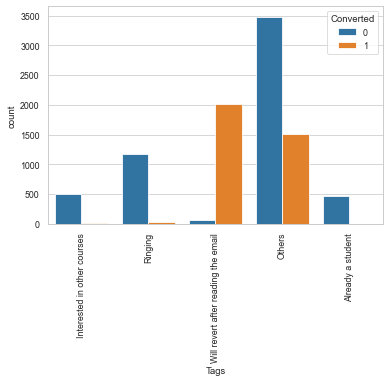

In [393]:
# Understanding Tags :
sns.countplot(x = "Tags", hue = "Converted", data = Leads_1_excl)
plt.xticks(rotation = 90)
plt.show()

In [394]:
# Inference :
# What we infer from the above the plot is that 'Will Revert after reading the email' have high conversion and we should focus more on the leads.

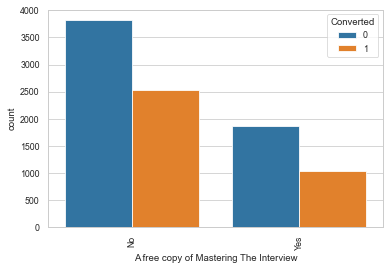

In [395]:
# Understanding the 'A free copy of Mastering The Interview' :
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = Leads_1_excl)
plt.xticks(rotation = 90)
plt.show()

In [396]:
# Inference :
# What we can infer from the above plot is that more leads are from those who do not ask for free copy of mastering interviews so focus should be more on the conversion.

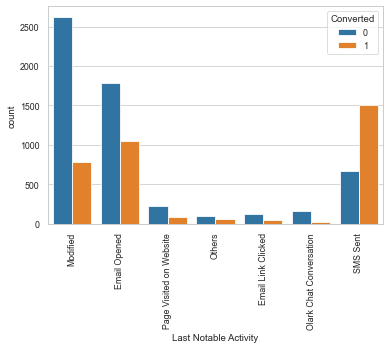

In [397]:
# Understanding 'Last Notable Activity' :
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = Leads_1_excl)
plt.xticks(rotation = 90)
plt.show()

In [398]:
# Inference :
# What we can infer from the above plots is that More leads are from those who have modified their account or opened email. Focus should be on their conversion

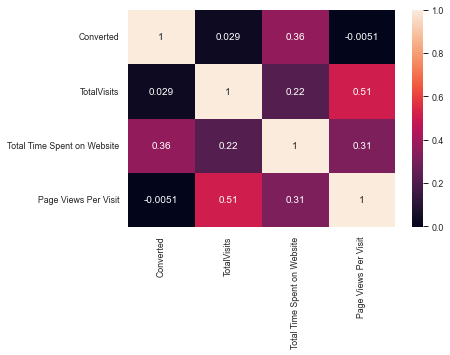

In [399]:
# Understanding 'umerical columns (TotalVisits, Total Time Spent on Website, Page Views Per Visit, Converted)
sns.heatmap(Leads_1_excl.corr(),annot=True)
plt.show()

In [400]:
# Inference :
# Since we have used the Heatmap for this data, we can infer that there is a strong correlation between TotalVisit and Page Views Per Visit.
# We can also infer from the above Heatmap , Coverted has a good corelation with total time spent on website .

In [401]:
# Let's now Create an Outlier Treatment for the Numerical Columns :
# We can see that the data for the Treatment comes from the following :
# 1.TotalVisits
# 2.Total Time Spent on Website
# 3.Page Views Per Visit

In [402]:
Num_cols_1 = Leads_1_excl[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

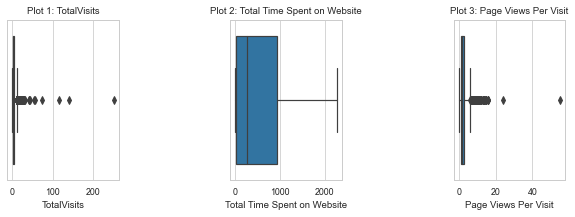

In [403]:
plt.figure(figsize=(10,10))

for i in enumerate(Num_cols_1):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(Leads_1_excl[i[1]])
    plt.title("Plot "+str(i[0]+1)+": "+i[1])
plt.subplots_adjust(wspace=1,hspace=0.2)
    
plt.show()

In [404]:
P1=Num_cols_1.quantile(.25)
P3=Num_cols_1.quantile(.75)
IQR=P3-P1
print(IQR*1.5)

TotalVisits                       6.0
Total Time Spent on Website    1386.0
Page Views Per Visit              3.0
dtype: float64


In [405]:
print(P3+IQR*1.5)

TotalVisits                      11.0
Total Time Spent on Website    2322.0
Page Views Per Visit              6.0
dtype: float64


In [406]:
# Now we can Impute the outliers in TotalVisits and Page Views Per Visit with 1.5*IQR :
Leads_1_excl.loc[Leads_1_excl['TotalVisits'] > 11, 'TotalVisits'] = 6
Leads_1_excl.loc[Leads_1_excl['Page Views Per Visit'] > 6, 'Page Views Per Visit'] = 3

In [407]:
Leads_1_excl.shape

(9240, 13)

In [408]:
Leads_1_excl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   Tags                                    9240 non-null   object 
 10  City                                    9240 non-null   obje

In [409]:
Leads_1_excl.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Others,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Others,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [410]:
# Let's now create a Dummy Variable for 'A free copy of Mastering The Interview':
Leads_1_excl['A free copy of Mastering The Interview'] = Leads_1_excl['A free copy of Mastering The Interview'].map({'No':0,'Yes':1})
Leads_1_excl['A free copy of Mastering The Interview'].value_counts()

0    6352
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [411]:
Leads_1_excl = pd.get_dummies(Leads_1_excl, drop_first=True)
Leads_1_excl.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,City_Others,City_Thane & Outskirts,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0


In [412]:
Leads_1_excl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9240 non-null   int64  
 1   TotalVisits                                           9240 non-null   float64
 2   Total Time Spent on Website                           9240 non-null   int64  
 3   Page Views Per Visit                                  9240 non-null   float64
 4   A free copy of Mastering The Interview                9240 non-null   int64  
 5   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 7   Lead Origin_Lead Import                               9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                            9240

In [413]:
# Now we create a Train-Test Split :
X=Leads_1_excl.drop('Converted',axis=1)
y=Leads_1_excl.Converted

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [414]:
# Scaling the above Test Split :
to_scale_1=['TotalVisits','Total Time Spent on Website']
scaler = StandardScaler()
X_train[to_scale_1]=scaler.fit_transform(X_train[to_scale_1])

In [415]:
# Model Building :
# Let's Now create a model for the data :
# Let's do Feature Selection Using RFE :

In [416]:
logreg=LogisticRegression()
rfe=RFE(logreg).fit(X_train,y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('A free copy of Mastering The Interview', False, 22),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Origin_Quick Add Form', False, 7),
 ('Lead Source_Google', False, 6),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Others', False, 17),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 3),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 12),
 ('Last Activity_Page Visited on Website', False, 21),
 ('Last Activity_SMS Sent', True, 1),
 ('Specia

In [417]:
col=X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last

In [418]:
# Let's start buliding a Model:
# Model - I

In [419]:
X_train_1 = sm.add_constant(X_train[col])
log_m1 = sm.GLM(y_train,X_train_1,family=sm.families.Binomial())
log_model_1 = log_m1.fit()
log_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1592.2
Date:                Mon, 14 Mar 2022   Deviance:                       3184.4
Time:                        15:34:28   Pearson chi2:                 1.12e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5670
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.2267      0.361    -11.699      0.000      -4.935      -3.519
Total Time Spent on Website                              1.1267      0.053     21.216      0.000       1.023       1.231
Lead Origin_Landing Page Submission                     -0.5184      0.121     -4.270      0.000      -0.756      -0.280
Lead Origin_Lead Add Form                                1.5714      0.673      2.335      0.020       0.252       2.890
Lead Source_Olark Chat                                   0.9838      0.152      6.479      0.000       0.686       1.281
Lead Source_Reference                                    1.6524      0.712      2.322      0.020       0.258       3.047
Lead Source_Welingak Website                             3.2052      0.981      3.268      0.001       1.283       5.127
Last Activity_Email Bounced                             -1.3524      0.403     -3.354      0.001      -2.143      -0.562
Last Activity_Email Opened                               1.1863      0.219      5.420      0.000       0.757       1.615
Last Activity_Form Submitted on Website                  0.4061      0.437      0.930      0.352      -0.450       1.262
Last Activity_Olark Chat Conversation                   -0.3391      0.275     -1.234      0.217      -0.877       0.199
Last Activity_SMS Sent                                   1.4025      0.226      6.202      0.000       0.959       1.846
Specialization_E-COMMERCE                                0.4516      0.382      1.181      0.238      -0.298       1.201
Specialization_Finance Management                        0.3541      0.163      2.174      0.030       0.035       0.673
Specialization_Hospitality Management                   -0.6844      0.426     -1.607      0.108      -1.519       0.150
Specialization_International Business                   -0.6815      0.367     -1.858      0.063      -1.400       0.037
Specialization_Travel and Tourism                       -0.5515      0.344     -1.603      0.109      -1.226       0.123
What is your current occupation_Housewife               21.3049   1.33e+04      0.002      0.999   -2.61e+04    2.61e+04
What is your current occupation_Other                   -1.2632      0.104    -12.156      0.000      -1.467      -1.059
What is your current occupation_Working Professional     1.2920      0.270      4.778      0.000       0.762       1.822
Tags_Others                                              3.3448      0.305     10.958      0.000       2.747       3.943
Tags_Ringing                                            -0.6465      0.374     -1.728      0.084      -1.380       0.087
Tags_Will revert after reading the email                 6

In [420]:
# Now we drop the variable 'What is your current occupation_Housewife' since it has a very high P-Value and we build the model again .
col = col.drop('What is your current occupation_Housewife', 1)

X_train_2 = sm.add_constant(X_train[col])
log_m2 = sm.GLM(y_train,X_train_2,family=sm.families.Binomial())
log_model_2 = log_m2.fit()
log_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6441
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1594.6
Date:                Mon, 14 Mar 2022   Deviance:                       3189.3
Time:                        15:34:29   Pearson chi2:                 1.13e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5667
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.2355      0.361    -11.721      0.000      -4.944      -3.527
Total Time Spent on Website                              1.1272      0.053     21.226      0.000       1.023       1.231
Lead Origin_Landing Page Submission                     -0.5110      0.121     -4.213      0.000      -0.749      -0.273
Lead Origin_Lead Add Form                                1.5703      0.673      2.333      0.020       0.251       2.890
Lead Source_Olark Chat                                   0.9839      0.152      6.480      0.000       0.686       1.281
Lead Source_Reference                                    1.6696      0.712      2.346      0.019       0.275       3.064
Lead Source_Welingak Website                             3.2056      0.981      3.268      0.001       1.283       5.128
Last Activity_Email Bounced                             -1.3543      0.403     -3.357      0.001      -2.145      -0.564
Last Activity_Email Opened                               1.2020      0.218      5.507      0.000       0.774       1.630
Last Activity_Form Submitted on Website                  0.4212      0.433      0.973      0.330      -0.427       1.270
Last Activity_Olark Chat Conversation                   -0.3371      0.275     -1.227      0.220      -0.876       0.201
Last Activity_SMS Sent                                   1.4014      0.226      6.198      0.000       0.958       1.845
Specialization_E-COMMERCE                                0.4455      0.382      1.165      0.244      -0.304       1.195
Specialization_Finance Management                        0.3493      0.163      2.147      0.032       0.030       0.668
Specialization_Hospitality Management                   -0.6934      0.426     -1.626      0.104      -1.529       0.142
Specialization_International Business                   -0.6885      0.367     -1.876      0.061      -1.408       0.031
Specialization_Travel and Tourism                       -0.5590      0.344     -1.624      0.104      -1.234       0.116
What is your current occupation_Other                   -1.2683      0.104    -12.212      0.000      -1.472      -1.065
What is your current occupation_Working Professional     1.2825      0.270      4.742      0.000       0.752       1.813
Tags_Others                                              3.3523      0.305     10.983      0.000       2.754       3.950
Tags_Ringing                                            -0.6449      0.374     -1.724      0.085      -1.378       0.088
Tags_Will revert after reading the email                 6.6828      0.342     19.514      0.000       6.012       7.354
Last Notable Activity_Email Opened                      -0

In [421]:
# Now we drop the variable 'Last Notable Activity_Others' since it has a very high P-Value and build the model again .
col = col.drop('Last Notable Activity_Others', 1)

X_train_3 = sm.add_constant(X_train[col])
log_m3 = sm.GLM(y_train,X_train_3,family=sm.families.Binomial())
log_model_3 = log_m3.fit()
log_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1595.7
Date:                Mon, 14 Mar 2022   Deviance:                       3191.4
Time:                        15:34:30   Pearson chi2:                 1.12e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5665
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.1126      0.349    -11.768      0.000      -4.798      -3.428
Total Time Spent on Website                              1.1237      0.053     21.204      0.000       1.020       1.228
Lead Origin_Landing Page Submission                     -0.5162      0.121     -4.259      0.000      -0.754      -0.279
Lead Origin_Lead Add Form                                1.5440      0.666      2.317      0.021       0.238       2.850
Lead Source_Olark Chat                                   0.9744      0.152      6.430      0.000       0.677       1.271
Lead Source_Reference                                    1.6823      0.706      2.384      0.017       0.299       3.065
Lead Source_Welingak Website                             3.2370      0.977      3.314      0.001       1.323       5.151
Last Activity_Email Bounced                             -1.1582      0.379     -3.053      0.002      -1.902      -0.415
Last Activity_Email Opened                               1.2245      0.218      5.611      0.000       0.797       1.652
Last Activity_Form Submitted on Website                  0.4501      0.434      1.038      0.299      -0.400       1.300
Last Activity_Olark Chat Conversation                   -0.3163      0.275     -1.151      0.250      -0.855       0.222
Last Activity_SMS Sent                                   1.4238      0.226      6.296      0.000       0.981       1.867
Specialization_E-COMMERCE                                0.4444      0.383      1.159      0.246      -0.307       1.196
Specialization_Finance Management                        0.3496      0.162      2.151      0.031       0.031       0.668
Specialization_Hospitality Management                   -0.6906      0.424     -1.628      0.104      -1.522       0.141
Specialization_International Business                   -0.6772      0.367     -1.847      0.065      -1.396       0.041
Specialization_Travel and Tourism                       -0.5658      0.344     -1.646      0.100      -1.239       0.108
What is your current occupation_Other                   -1.2679      0.104    -12.214      0.000      -1.471      -1.064
What is your current occupation_Working Professional     1.2785      0.271      4.726      0.000       0.748       1.809
Tags_Others                                              3.3500      0.305     10.983      0.000       2.752       3.948
Tags_Ringing                                            -0.6431      0.374     -1.720      0.085      -1.376       0.090
Tags_Will revert after reading the email                 6.6956      0.342     19.562      0.000       6.025       7.366
Last Notable Activity_Email Opened                      -0

In [422]:
# Now we drop the variable 'Tags_Ringing' since it has the high P-Value and we build the model again :
col = col.drop('Tags_Ringing', 1)

X_train_4 = sm.add_constant(X_train[col])
log_m4 = sm.GLM(y_train,X_train_4,family=sm.families.Binomial())
log_model_4 = log_m4.fit()
log_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1597.1
Date:                Mon, 14 Mar 2022   Deviance:                       3194.2
Time:                        15:34:30   Pearson chi2:                 1.09e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5663
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.5448      0.265    -17.161      0.000      -5.064      -4.026
Total Time Spent on Website                              1.1225      0.053     21.190      0.000       1.019       1.226
Lead Origin_Landing Page Submission                     -0.5233      0.121     -4.321      0.000      -0.761      -0.286
Lead Origin_Lead Add Form                                1.5310      0.663      2.309      0.021       0.231       2.831
Lead Source_Olark Chat                                   0.9721      0.151      6.419      0.000       0.675       1.269
Lead Source_Reference                                    1.6595      0.702      2.365      0.018       0.284       3.035
Lead Source_Welingak Website                             3.2432      0.974      3.328      0.001       1.333       5.153
Last Activity_Email Bounced                             -1.1606      0.380     -3.057      0.002      -1.905      -0.416
Last Activity_Email Opened                               1.2338      0.219      5.639      0.000       0.805       1.663
Last Activity_Form Submitted on Website                  0.4474      0.434      1.030      0.303      -0.404       1.299
Last Activity_Olark Chat Conversation                   -0.3196      0.275     -1.161      0.246      -0.859       0.220
Last Activity_SMS Sent                                   1.4151      0.226      6.259      0.000       0.972       1.858
Specialization_E-COMMERCE                                0.4428      0.382      1.158      0.247      -0.307       1.192
Specialization_Finance Management                        0.3429      0.162      2.115      0.034       0.025       0.661
Specialization_Hospitality Management                   -0.6603      0.425     -1.555      0.120      -1.493       0.172
Specialization_International Business                   -0.6717      0.366     -1.833      0.067      -1.390       0.047
Specialization_Travel and Tourism                       -0.5600      0.344     -1.630      0.103      -1.233       0.113
What is your current occupation_Other                   -1.2687      0.104    -12.236      0.000      -1.472      -1.065
What is your current occupation_Working Professional     1.3010      0.273      4.765      0.000       0.766       1.836
Tags_Others                                              3.7915      0.194     19.524      0.000       3.411       4.172
Tags_Will revert after reading the email                 7.1332      0.251     28.374      0.000       6.640       7.626
Last Notable Activity_Email Opened                      -1.0012      0.280     -3.572      0.000      -1.551      -0.452
Last Notable Activity_Modified                          -0

In [423]:
# Now we Drop the variable 'Specialization_Hospitality Management' since it has a highh P-Value and rebuild the model :
col = col.drop('Specialization_Hospitality Management', 1)

X_train_5 = sm.add_constant(X_train[col])
log_m5 = sm.GLM(y_train,X_train_5,family=sm.families.Binomial())
log_model_5 = log_m5.fit()
log_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1598.4
Date:                Mon, 14 Mar 2022   Deviance:                       3196.7
Time:                        15:34:31   Pearson chi2:                 1.08e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5662
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.5523      0.265    -17.182      0.000      -5.072      -4.033
Total Time Spent on Website                              1.1192      0.053     21.176      0.000       1.016       1.223
Lead Origin_Landing Page Submission                     -0.5360      0.121     -4.435      0.000      -0.773      -0.299
Lead Origin_Lead Add Form                                1.5366      0.664      2.316      0.021       0.236       2.837
Lead Source_Olark Chat                                   0.9709      0.151      6.412      0.000       0.674       1.268
Lead Source_Reference                                    1.6178      0.702      2.306      0.021       0.243       2.993
Lead Source_Welingak Website                             3.2372      0.975      3.321      0.001       1.327       5.148
Last Activity_Email Bounced                             -1.1874      0.381     -3.120      0.002      -1.933      -0.441
Last Activity_Email Opened                               1.2294      0.219      5.616      0.000       0.800       1.658
Last Activity_Form Submitted on Website                  0.4548      0.434      1.048      0.294      -0.395       1.305
Last Activity_Olark Chat Conversation                   -0.3224      0.275     -1.172      0.241      -0.862       0.217
Last Activity_SMS Sent                                   1.4104      0.226      6.245      0.000       0.968       1.853
Specialization_E-COMMERCE                                0.4576      0.382      1.197      0.231      -0.292       1.207
Specialization_Finance Management                        0.3583      0.162      2.215      0.027       0.041       0.675
Specialization_International Business                   -0.6568      0.366     -1.794      0.073      -1.374       0.061
Specialization_Travel and Tourism                       -0.5439      0.343     -1.584      0.113      -1.217       0.129
What is your current occupation_Other                   -1.2703      0.104    -12.255      0.000      -1.473      -1.067
What is your current occupation_Working Professional     1.3026      0.272      4.782      0.000       0.769       1.836
Tags_Others                                              3.7991      0.194     19.557      0.000       3.418       4.180
Tags_Will revert after reading the email                 7.1349      0.251     28.401      0.000       6.642       7.627
Last Notable Activity_Email Opened                      -0.9966      0.280     -3.553      0.000      -1.546      -0.447
Last Notable Activity_Modified                          -0.9643      0.222     -4.342      0.000      -1.400      -0.529
Last Notable Activity_Olark Chat Conversation           -0

In [424]:
# Now let us check the VIF of the above model :
# In order to do this we create a dataframe that contains all the  feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,16.19
4,Lead Source_Reference,12.95
19,Last Notable Activity_Email Opened,9.62
7,Last Activity_Email Opened,8.96
22,Last Notable Activity_SMS Sent,7.77
10,Last Activity_SMS Sent,7.38
20,Last Notable Activity_Modified,4.55
17,Tags_Others,4.11
5,Lead Source_Welingak Website,3.81
1,Lead Origin_Landing Page Submission,3.26


In [425]:
# As we see that the 'Lead_source_reference' has a very high VIF , so we drop this variable :
col = col.drop('Lead Source_Reference', 1)

X_train_6 = sm.add_constant(X_train[col])
log_m6 = sm.GLM(y_train,X_train_6,family=sm.families.Binomial())
log_model_6 = log_m6.fit()
log_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1600.8
Date:                Mon, 14 Mar 2022   Deviance:                       3201.6
Time:                        15:34:32   Pearson chi2:                 1.04e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5659
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.5282      0.264    -17.153      0.000      -5.046      -4.011
Total Time Spent on Website                              1.1171      0.053     21.155      0.000       1.014       1.221
Lead Origin_Landing Page Submission                     -0.5385      0.121     -4.456      0.000      -0.775      -0.302
Lead Origin_Lead Add Form                                2.9813      0.261     11.443      0.000       2.471       3.492
Lead Source_Olark Chat                                   0.9637      0.152      6.360      0.000       0.667       1.261
Lead Source_Welingak Website                             1.7954      0.760      2.362      0.018       0.305       3.285
Last Activity_Email Bounced                             -1.2815      0.383     -3.344      0.001      -2.032      -0.530
Last Activity_Email Opened                               1.2313      0.218      5.640      0.000       0.803       1.659
Last Activity_Form Submitted on Website                  0.4602      0.432      1.064      0.287      -0.387       1.307
Last Activity_Olark Chat Conversation                   -0.3202      0.275     -1.165      0.244      -0.859       0.218
Last Activity_SMS Sent                                   1.4016      0.226      6.214      0.000       0.959       1.844
Specialization_E-COMMERCE                                0.4606      0.382      1.207      0.227      -0.287       1.209
Specialization_Finance Management                        0.3618      0.162      2.240      0.025       0.045       0.678
Specialization_International Business                   -0.6471      0.365     -1.773      0.076      -1.362       0.068
Specialization_Travel and Tourism                       -0.5409      0.343     -1.575      0.115      -1.214       0.132
What is your current occupation_Other                   -1.2680      0.104    -12.237      0.000      -1.471      -1.065
What is your current occupation_Working Professional     1.3345      0.271      4.919      0.000       0.803       1.866
Tags_Others                                              3.7848      0.193     19.568      0.000       3.406       4.164
Tags_Will revert after reading the email                 7.1159      0.250     28.410      0.000       6.625       7.607
Last Notable Activity_Email Opened                      -1.0059      0.280     -3.592      0.000      -1.555      -0.457
Last Notable Activity_Modified                          -0.9713      0.222     -4.376      0.000      -1.406      -0.536
Last Notable Activity_Olark Chat Conversation           -0.7603      0.495     -1.537      0.124      -1.730       0.209
Last Notable Activity_SMS Sent                           0

In [426]:
# Now we again check the VIF for the model :
# First we create a data frame that contains all the  feature variables and their respective VIFs :
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Last Notable Activity_Email Opened,9.62
6,Last Activity_Email Opened,8.96
21,Last Notable Activity_SMS Sent,7.77
9,Last Activity_SMS Sent,7.38
19,Last Notable Activity_Modified,4.55
16,Tags_Others,4.11
1,Lead Origin_Landing Page Submission,3.26
8,Last Activity_Olark Chat Conversation,2.48
17,Tags_Will revert after reading the email,2.38
14,What is your current occupation_Other,2.35


In [427]:
# Now we drop the variable 'Last Notable Activity_Email Opened' since it has a very high VIF :
col = col.drop('Last Notable Activity_Email Opened', 1)

X_train_7 = sm.add_constant(X_train[col])
log_m7 = sm.GLM(y_train,X_train_7,family=sm.families.Binomial())
log_model_7 = log_m7.fit()
log_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1607.2
Date:                Mon, 14 Mar 2022   Deviance:                       3214.4
Time:                        15:34:33   Pearson chi2:                 1.05e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5650
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.8836      0.249    -19.624      0.000      -5.371      -4.396
Total Time Spent on Website                              1.1151      0.053     21.171      0.000       1.012       1.218
Lead Origin_Landing Page Submission                     -0.5397      0.121     -4.475      0.000      -0.776      -0.303
Lead Origin_Lead Add Form                                2.9751      0.260     11.456      0.000       2.466       3.484
Lead Source_Olark Chat                                   0.9829      0.152      6.482      0.000       0.686       1.280
Lead Source_Welingak Website                             1.8056      0.763      2.366      0.018       0.310       3.302
Last Activity_Email Bounced                             -1.3769      0.382     -3.603      0.000      -2.126      -0.628
Last Activity_Email Opened                               0.6475      0.144      4.483      0.000       0.364       0.931
Last Activity_Form Submitted on Website                  0.1884      0.424      0.444      0.657      -0.643       1.020
Last Activity_Olark Chat Conversation                   -0.6104      0.260     -2.352      0.019      -1.119      -0.102
Last Activity_SMS Sent                                   1.1225      0.208      5.395      0.000       0.715       1.530
Specialization_E-COMMERCE                                0.4239      0.383      1.107      0.268      -0.327       1.175
Specialization_Finance Management                        0.3672      0.160      2.298      0.022       0.054       0.680
Specialization_International Business                   -0.6277      0.363     -1.727      0.084      -1.340       0.085
Specialization_Travel and Tourism                       -0.5480      0.342     -1.603      0.109      -1.218       0.122
What is your current occupation_Other                   -1.2687      0.103    -12.260      0.000      -1.472      -1.066
What is your current occupation_Working Professional     1.3289      0.271      4.903      0.000       0.798       1.860
Tags_Others                                              3.7970      0.193     19.636      0.000       3.418       4.176
Tags_Will revert after reading the email                 7.0982      0.250     28.433      0.000       6.609       7.588
Last Notable Activity_Modified                          -0.3475      0.139     -2.500      0.012      -0.620      -0.075
Last Notable Activity_Olark Chat Conversation           -0.1359      0.462     -0.294      0.769      -1.042       0.770
Last Notable Activity_SMS Sent                           0.8322      0.232      3.586      0.000       0.377       1.287
==========================================================

In [428]:
# Let us now check the VIF :
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_SMS Sent,6.82
20,Last Notable Activity_SMS Sent,6.62
16,Tags_Others,4.04
1,Lead Origin_Landing Page Submission,3.04
18,Last Notable Activity_Modified,2.74
14,What is your current occupation_Other,2.34
17,Tags_Will revert after reading the email,2.33
6,Last Activity_Email Opened,2.26
3,Lead Source_Olark Chat,2.21
8,Last Activity_Olark Chat Conversation,2.20


In [429]:
# Let us proceeed further by dropping the variable 'Tags_Others' since it has a high VIF :
col = col.drop('Tags_Others', 1)

X_train_8 = sm.add_constant(X_train[col])
log_m8 = sm.GLM(y_train,X_train_8,family=sm.families.Binomial())
log_model_8 = log_m8.fit()
log_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1973.2
Date:                Mon, 14 Mar 2022   Deviance:                       3946.5
Time:                        15:34:34   Pearson chi2:                 9.94e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5129
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0045      0.157    -12.740      0.000      -2.313      -1.696
Total Time Spent on Website                              1.0352      0.045     22.896      0.000       0.947       1.124
Lead Origin_Landing Page Submission                     -0.5573      0.108     -5.183      0.000      -0.768      -0.347
Lead Origin_Lead Add Form                                3.0225      0.223     13.539      0.000       2.585       3.460
Lead Source_Olark Chat                                   1.0322      0.138      7.493      0.000       0.762       1.302
Lead Source_Welingak Website                             2.6817      0.750      3.576      0.000       1.212       4.151
Last Activity_Email Bounced                             -1.2037      0.365     -3.299      0.001      -1.919      -0.489
Last Activity_Email Opened                               0.5034      0.134      3.756      0.000       0.241       0.766
Last Activity_Form Submitted on Website                  0.1571      0.402      0.390      0.696      -0.632       0.946
Last Activity_Olark Chat Conversation                   -0.8702      0.245     -3.553      0.000      -1.350      -0.390
Last Activity_SMS Sent                                   0.9922      0.190      5.226      0.000       0.620       1.364
Specialization_E-COMMERCE                                0.3097      0.351      0.883      0.377      -0.378       0.997
Specialization_Finance Management                        0.2694      0.140      1.929      0.054      -0.004       0.543
Specialization_International Business                   -0.4581      0.334     -1.372      0.170      -1.112       0.196
Specialization_Travel and Tourism                       -0.3221      0.328     -0.981      0.327      -0.966       0.321
What is your current occupation_Other                   -0.2428      0.094     -2.577      0.010      -0.428      -0.058
What is your current occupation_Working Professional     1.6009      0.240      6.681      0.000       1.131       2.071
Tags_Will revert after reading the email                 4.2834      0.171     25.075      0.000       3.949       4.618
Last Notable Activity_Modified                          -0.2191      0.127     -1.718      0.086      -0.469       0.031
Last Notable Activity_Olark Chat Conversation            0.1652      0.430      0.385      0.701      -0.677       1.007
Last Notable Activity_SMS Sent                           0.6744      0.211      3.193      0.001       0.260       1.088
========================================================================================================================
"""

In [430]:
# Let us now drop the variable 'Specialization_Travel and Tourism' since it has a Very high P-Value and build the model again :
col = col.drop('Specialization_Travel and Tourism', 1)

X_train_9 = sm.add_constant(X_train[col])
log_m9 = sm.GLM(y_train,X_train_9,family=sm.families.Binomial())
log_model_9 = log_m9.fit()
log_model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1973.7
Date:                Mon, 14 Mar 2022   Deviance:                       3947.5
Time:                        15:34:35   Pearson chi2:                 9.89e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5128
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0043      0.157    -12.740      0.000      -2.313      -1.696
Total Time Spent on Website                              1.0355      0.045     22.905      0.000       0.947       1.124
Lead Origin_Landing Page Submission                     -0.5683      0.107     -5.311      0.000      -0.778      -0.359
Lead Origin_Lead Add Form                                3.0235      0.223     13.543      0.000       2.586       3.461
Lead Source_Olark Chat                                   1.0318      0.138      7.490      0.000       0.762       1.302
Lead Source_Welingak Website                             2.6818      0.750      3.576      0.000       1.212       4.152
Last Activity_Email Bounced                             -1.2093      0.364     -3.321      0.001      -1.923      -0.496
Last Activity_Email Opened                               0.5052      0.134      3.769      0.000       0.242       0.768
Last Activity_Form Submitted on Website                  0.1534      0.403      0.381      0.703      -0.636       0.943
Last Activity_Olark Chat Conversation                   -0.8649      0.245     -3.533      0.000      -1.345      -0.385
Last Activity_SMS Sent                                   0.9924      0.190      5.231      0.000       0.621       1.364
Specialization_E-COMMERCE                                0.3216      0.350      0.918      0.359      -0.365       1.008
Specialization_Finance Management                        0.2803      0.139      2.013      0.044       0.007       0.553
Specialization_International Business                   -0.4482      0.334     -1.343      0.179      -1.102       0.206
What is your current occupation_Other                   -0.2447      0.094     -2.598      0.009      -0.429      -0.060
What is your current occupation_Working Professional     1.5982      0.240      6.672      0.000       1.129       2.068
Tags_Will revert after reading the email                 4.2765      0.171     25.076      0.000       3.942       4.611
Last Notable Activity_Modified                          -0.2229      0.127     -1.749      0.080      -0.473       0.027
Last Notable Activity_Olark Chat Conversation            0.1616      0.430      0.376      0.707      -0.681       1.004
Last Notable Activity_SMS Sent                           0.6740      0.211      3.194      0.001       0.260       1.088
========================================================================================================================
"""

In [431]:
# Also we drop the variable 'Specialization_International Business' for its high P-Value and we build the model again :
col = col.drop('Specialization_International Business', 1)

X_train_10 = sm.add_constant(X_train[col])
log_m10 = sm.GLM(y_train,X_train_10,family=sm.families.Binomial())
log_model_10 = log_m10.fit()
log_model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1974.7
Date:                Mon, 14 Mar 2022   Deviance:                       3949.4
Time:                        15:34:35   Pearson chi2:                 9.85e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5126
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0105      0.157    -12.778      0.000      -2.319      -1.702
Total Time Spent on Website                              1.0354      0.045     22.911      0.000       0.947       1.124
Lead Origin_Landing Page Submission                     -0.5766      0.107     -5.394      0.000      -0.786      -0.367
Lead Origin_Lead Add Form                                3.0219      0.223     13.539      0.000       2.584       3.459
Lead Source_Olark Chat                                   1.0357      0.138      7.516      0.000       0.766       1.306
Lead Source_Welingak Website                             2.6891      0.750      3.586      0.000       1.219       4.159
Last Activity_Email Bounced                             -1.2130      0.364     -3.330      0.001      -1.927      -0.499
Last Activity_Email Opened                               0.5053      0.134      3.769      0.000       0.243       0.768
Last Activity_Form Submitted on Website                  0.1561      0.403      0.388      0.698      -0.633       0.945
Last Activity_Olark Chat Conversation                   -0.8638      0.245     -3.531      0.000      -1.343      -0.384
Last Activity_SMS Sent                                   0.9913      0.190      5.227      0.000       0.620       1.363
Specialization_E-COMMERCE                                0.3345      0.350      0.955      0.340      -0.352       1.021
Specialization_Finance Management                        0.2927      0.139      2.106      0.035       0.020       0.565
What is your current occupation_Other                   -0.2442      0.094     -2.593      0.010      -0.429      -0.060
What is your current occupation_Working Professional     1.6017      0.239      6.694      0.000       1.133       2.071
Tags_Will revert after reading the email                 4.2731      0.170     25.063      0.000       3.939       4.607
Last Notable Activity_Modified                          -0.2210      0.127     -1.734      0.083      -0.471       0.029
Last Notable Activity_Olark Chat Conversation            0.1637      0.430      0.381      0.703      -0.678       1.006
Last Notable Activity_SMS Sent                           0.6761      0.211      3.203      0.001       0.262       1.090
========================================================================================================================
"""

In [432]:
#  Now we see tha the P-value is within the range and we can now check the VIF :
# Lets do that by first creating an data frame that contains all the respiective VIF's and names of all the feature variables:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_SMS Sent,6.78
17,Last Notable Activity_SMS Sent,6.55
1,Lead Origin_Landing Page Submission,2.86
15,Last Notable Activity_Modified,2.60
8,Last Activity_Olark Chat Conversation,2.20
3,Lead Source_Olark Chat,2.13
6,Last Activity_Email Opened,2.05
14,Tags_Will revert after reading the email,1.87
2,Lead Origin_Lead Add Form,1.72
12,What is your current occupation_Other,1.64


In [433]:
# We can infer from the above data is that VIF is under control and does not contain values more that 5 for the VIF :

In [434]:
# Let us now Proceed with the probability prediction :
y_train_pred = log_model_10.predict(X_train_10).values.reshape(-1)
y_train_pred[:10]

array([0.19999822, 0.11146487, 0.23406819, 0.62102633, 0.16696699,
       0.99897706, 0.05533193, 0.89297457, 0.13606669, 0.99746349])

In [435]:
y_train_pred

array([0.19999822, 0.11146487, 0.23406819, ..., 0.19999822, 0.03647856,
       0.13569915])

In [436]:
y_train

1871    0
6795    0
3516    0
8105    0
3934    0
       ..
350     1
79      1
8039    1
6936    0
5640    0
Name: Converted, Length: 6468, dtype: int64

In [437]:
y_train_pred_final = pd.DataFrame({'Converted_Ind':y_train.values, 'Converted_Prob': y_train_pred})
y_train_pred_final['Prospect_Id'] = y_train.index
y_train_pred_final.head()

,Converted_Ind,Converted_Prob,Prospect_Id
0,0,0.199998,1871
1,0,0.111465,6795
2,0,0.234068,3516
3,0,0.621026,8105
4,0,0.166967,3934


In [438]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted_Ind,Converted_Prob,Prospect_Id,Predicted
0,0,0.199998,1871,0
1,0,0.111465,6795,0
2,0,0.234068,3516,0
3,0,0.621026,8105,1
4,0,0.166967,3934,0


In [439]:
# Lets create a confusion Matrix :
confusion = confusion_matrix(y_train_pred_final.Converted_Ind, y_train_pred_final.Predicted )
confusion

array([[3744,  258],
       [ 603, 1863]])

In [440]:
# Now we check the data and compare between actual and predicted :
# Let us now check the overall accuracy :
accuracy_score(y_train_pred_final.Converted_Ind, y_train_pred_final.Predicted)

0.8668831168831169

In [441]:
print(classification_report( y_train_pred_final.Converted_Ind, y_train_pred_final.Predicted ))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4002
           1       0.88      0.76      0.81      2466

    accuracy                           0.87      6468
   macro avg       0.87      0.85      0.85      6468
weighted avg       0.87      0.87      0.86      6468



In [442]:
# Let's go one step further by checking the metrics beyond  the found accuracy :
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [443]:
# Let's see the sensitivity/recall of our logistic regression model -- True Positive Rate
TP / float(TP+FN)

0.7554744525547445

In [444]:
# Let us calculate specificity
TN / float(TN+FP)

0.9355322338830585

In [445]:
# Calculate false postive rate - predicting converted when customer does have not converted -- 1-Specificity
print(FP/ float(TN+FP))

0.06446776611694154


In [446]:
# Positive predictive value - Precision
print (TP / float(TP+FP))

0.8783592644978784


In [447]:
# Negative predictive value - Precision
print (TN / float(TN+ FN))

0.8612836438923396


In [448]:
# Let's proceeed by plotting the ROC Curve :
# So we use this ROC curve to infer the following things :
# This graph shows the tradeoff between sensitivity and specificity 
# The closer the curve follows to the left-hand border and then the top border of the ROC space, the more accurate the test.
# The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [449]:
def draw_roc_1( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [450]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted_Ind, y_train_pred_final.Converted_Prob, drop_intermediate = False )

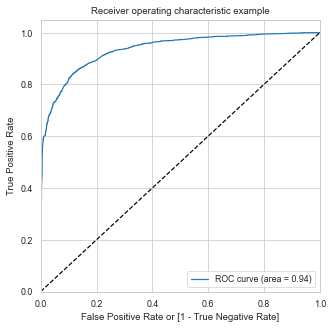

In [451]:
draw_roc_1(y_train_pred_final.Converted_Ind, y_train_pred_final.Converted_Prob)

In [452]:
# So we plotted the above graph let's now find the Optimal Cutoff Point :
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_Ind,Converted_Prob,Prospect_Id,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.199998,1871,0,1,1,0,0,0,0,0,0,0,0
1,0,0.111465,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.234068,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.621026,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.166967,3934,0,1,1,0,0,0,0,0,0,0,0


In [453]:
# Let's now calculate accuracy sensitivity and specificity for various probability cutoff :
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted_Ind, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.724181  0.965126  0.575712
0.2   0.2  0.835807  0.894161  0.799850
0.3   0.3  0.864873  0.850770  0.873563
0.4   0.4  0.868275  0.805353  0.907046
0.5   0.5  0.866883  0.755474  0.935532
0.6   0.6  0.864873  0.714517  0.957521
0.7   0.7  0.858844  0.674371  0.972514
0.8   0.8  0.846011  0.628143  0.980260
0.9   0.9  0.834106  0.577048  0.992504


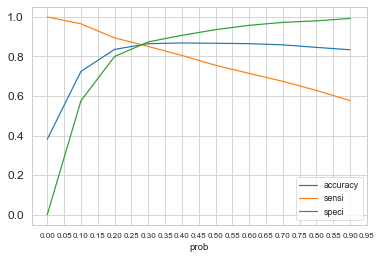

In [454]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)
plt.show()

In [455]:
# What we can infer from the above plot is that 0.28 is the optimum point to take it as the probability for cutoff :
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.28 else 0)
y_train_pred_final.head()

,Converted_Ind,Converted_Prob,Prospect_Id,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.199998,1871,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.111465,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.234068,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.621026,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.166967,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [456]:
# Now we need to find the overall accuracy :
accuracy_score(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted)

0.8620902906617193

In [457]:
confusion2 = confusion_matrix(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted )
confusion2

array([[3455,  547],
       [ 345, 2121]])

In [458]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [459]:
# Lets see what the sensitivity of our developed model is ?
TP / float(TP+FN)

0.8600973236009732

In [460]:
# Lets check the specificity :
TN / float(TN+FP)

0.8633183408295853

In [461]:
# Let's proceed by calculating the false positive rate which predicts whether the customer churns or not :
print(FP/ float(TN+FP))

0.1366816591704148


In [462]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7949775112443778


In [463]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9092105263157895


In [464]:
# Let's Now understand the Precision and Recall :
#  For Precision : TP/TP+FP
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7949775112443778

In [465]:
# For Recall :
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8600973236009732

In [466]:
# Let's Now use the SKLearn To understand the Precision and Recall :
precision_score(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted)

0.7949775112443778

In [467]:
recall_score(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted)

0.8600973236009732

In [468]:
# Precision Recall Trade-Off :
# The reason why we need to do this is to help us identify whether the predicted CONVERTED is actual CONVERTED.
# Let's now use this to identify the Most Optimized Threshold .

In [469]:
y_train_pred_final.Converted_Ind, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted_Ind, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [470]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted_Ind, y_train_pred_final.Converted_Prob)

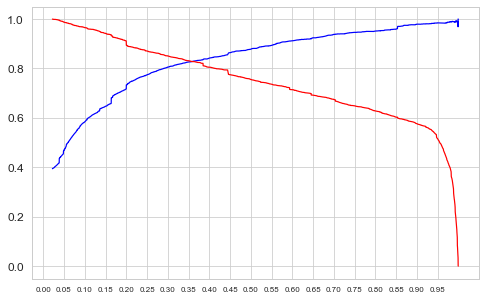

In [471]:
# Let's now plot this curve :
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)
plt.show()

In [472]:
# Inference :
# What we can infer from the above plot is that the Precision and Recall have a trade off of 0.33 , hence we use this number as the threshold on the given data .

In [473]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Converted_Ind,Converted_Prob,Prospect_Id,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.199998,1871,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.111465,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.234068,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.621026,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.166967,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [474]:
# Checking the Accuracy of the above data :
accuracy_score(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted)

0.8678107606679035

In [475]:
confusion3 = confusion_matrix(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted )
confusion3

array([[3543,  459],
       [ 396, 2070]])

In [476]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [477]:
# Let us now check the sensitivity of our model :
TP / float(TP+FN)

0.8394160583941606

In [478]:
# Also let us calculate the specificity of our model :
TN / float(TN+FP)

0.8853073463268366

In [479]:
# Let us now calculate the false positive rate :
print(FP/ float(TN+FP))

0.11469265367316342


In [480]:
# Let us now calculate positive predictive values :
print (TP / float(TP+FP))

0.8185053380782918


In [481]:
# Let us now calculate the Negative Predictive values :
print (TN / float(TN+ FN))

0.8994668697638994


In [482]:
# Precision And Recall On our Model :
precision_score(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted)

0.8185053380782918

In [483]:
recall_score(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted)

0.8394160583941606

In [484]:
# Let us now make a prediction on the supported Test Data :
# Scaling of the Model :
to_scale=['TotalVisits','Total Time Spent on Website']
X_test[to_scale]=scaler.transform(X_test[to_scale])

In [485]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 19 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 2772 non-null   float64
 1   Total Time Spent on Website                           2772 non-null   float64
 2   Lead Origin_Landing Page Submission                   2772 non-null   uint8  
 3   Lead Origin_Lead Add Form                             2772 non-null   uint8  
 4   Lead Source_Olark Chat                                2772 non-null   uint8  
 5   Lead Source_Welingak Website                          2772 non-null   uint8  
 6   Last Activity_Email Bounced                           2772 non-null   uint8  
 7   Last Activity_Email Opened                            2772 non-null   uint8  
 8   Last Activity_Form Submitted on Website               2

In [486]:
# Predcitions Made for the Final Test Model :
y_test_pred = log_model_10.predict(X_test_sm)
y_test_pred[:10]

4269    0.601410
2376    0.997613
7766    0.955184
9199    0.048504
4359    0.992408
9186    0.973303
1631    0.970299
8963    0.913635
8007    0.046328
5324    0.939334
dtype: float64

In [487]:
# Now we have an array of y_pred , let us a convert this to a DataFrame :
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.601410
2376,0.997613
7766,0.955184
9199,0.048504
4359,0.992408


In [488]:
# Also let us conver the y_test to a DataFrame :
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [489]:
# Merging the CustIndex to Index :
y_test_df['Prospect_IND'] = y_test_df.index

In [490]:
# Now let us remove the index from both the Data Frames and let us append them side by side :
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [491]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [492]:
y_pred_final.head()

,Converted,Prospect_IND,0
0,1,4269,0.601410
1,1,2376,0.997613
2,1,7766,0.955184
3,0,9199,0.048504
4,1,4359,0.992408


In [493]:
# Let us now Rename the Column :
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Converted_IND'})

In [494]:
# Let us now rearrange the data in the column :
y_pred_final = y_pred_final.reindex(['Prospect_IND','Converted_IND','Converted_Prob'], axis=1)

In [495]:
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob
0,4269,1,0.601410
1,2376,1,0.997613
2,7766,1,0.955184
3,9199,0,0.048504
4,4359,1,0.992408


In [496]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.33 else 0)
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted
0,4269,1,0.601410,1
1,2376,1,0.997613,1
2,7766,1,0.955184,1
3,9199,0,0.048504,0
4,4359,1,0.992408,1


In [497]:
# Chceking the accuracy of the above data :
accuracy_score(y_pred_final.Converted_IND, y_pred_final.final_predicted)

0.8658008658008658

In [498]:
confusion_final = confusion_matrix(y_pred_final.Converted_IND, y_pred_final.final_predicted )
confusion_final

array([[1487,  190],
       [ 182,  913]])

In [499]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

In [500]:
# Let us calculate the sensitivity of our Model :
TP / float(TP+FN)

0.8337899543378996

In [501]:
# Let us calcuate the Specificity of our Model :
TN / float(TN+FP)

0.8867024448419797

In [502]:
# Let's Now Find the Precision and Recall :
precision_score(y_pred_final.Converted_IND, y_pred_final.final_predicted)

0.827742520398912

In [503]:
recall_score(y_pred_final.Converted_IND, y_pred_final.final_predicted)

0.8337899543378996

In [504]:
# Now We neee to calculate the ROC curve of the Model :
fpr, tpr, thresholds = roc_curve(y_pred_final.Converted_IND, y_pred_final.Converted_Prob, drop_intermediate=False)

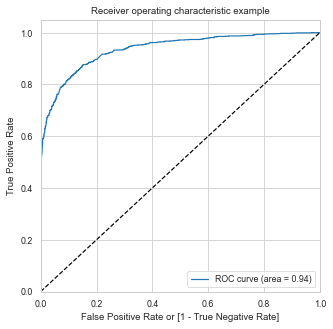

In [505]:
# Getting the functions to draw the ROC curve :
draw_roc_1( y_pred_final.Converted_IND, y_pred_final.Converted_Prob)

In [506]:
# Now let us conclude for the Lead Scoring :
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='lead_score',ascending=False)

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted,lead_score
2771,2960,1,0.997613,1,99
2189,3180,1,0.999021,1,99
2246,4804,1,0.992408,1,99
2249,8075,1,0.998819,1,99
2255,3932,1,0.997613,1,99
...,...,...,...,...,...
1508,5380,0,0.007647,0,0
2146,5472,0,0.007365,0,0
507,1844,0,0.008428,0,0
1620,5897,0,0.007054,0,0


In [507]:
# Now let us do some advance testing for pinpointing the results , this can be one using the decision trees :
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [508]:
X_train.shape, X_test.shape

((6468, 55), (2772, 55))

In [509]:
from sklearn.tree import DecisionTreeClassifier

In [510]:
dt_base_1 = DecisionTreeClassifier(random_state=42, max_depth=4)

In [511]:
dt_base_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [512]:
y_train_pred = dt_base_1.predict(X_train)
y_test_pred = dt_base_1.predict(X_test)

In [513]:
from sklearn.metrics import classification_report

In [514]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1677
           1       0.83      0.86      0.84      1095

    accuracy                           0.88      2772
   macro avg       0.87      0.87      0.87      2772
weighted avg       0.88      0.88      0.88      2772



In [515]:
# Now let us plot the ROC curve for the above data :
from sklearn.metrics import plot_roc_curve

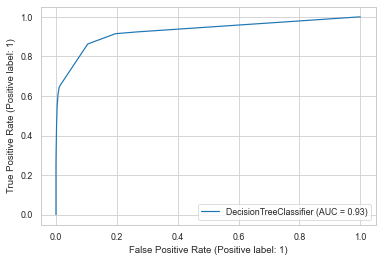

In [329]:
plot_roc_curve(dt_base_1, X_train, y_train, drop_intermediate=False)
plt.show()

In [516]:
# Inference for the problem statement :
# There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc.) in order to get a higher lead conversion. First, sort out the best prospects from the leads you have generated. 'TotalVisits' , 'Total Time Spent on Website' , 'Page Views Per Visit' which contribute most towards the probability of a lead getting converted. Then, You must keep a list of leads handy so that you can inform them about new courses, services, job offers and future higher studies. Monitor each lead carefully so that you can tailor the information you send to them. Carefully provide job offerings, information or courses that suits best according to the interest of the leads. A proper plan to chart the needs of each lead will go a long way to capture the leads as prospects. Focus on converted leads. Hold question-answer sessions with leads to extract the right information you need about them. Make further inquiries and appointments with the leads to determine their intention and mentality to join online courses.